# **DATA COLLECTION & PREPARATION**

## Importing The Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, mean_absolute_error, mean_squared_error, r2_score


## Loading The Dataset

In [2]:
df = pd.read_csv('/Users/chirusandeep/Movies/Document/datasets/diabetes prediction/diabetes_binary_health_indicators_BRFSS2015.csv')

# **DATA PREPARATION**

#Handling Missing Values

In [3]:
missing_values = df.isnull().sum()

if missing_values.sum() == 0:
    print("There are no missing values in the DataFrame.")
else:
    print("Missing values in each column:")
    print(missing_values)

There are no missing values in the DataFrame.


## Handling Categorical Data

In [4]:
categorical_columns = df.select_dtypes(include='category').columns.tolist()

if not categorical_columns:
    print("There are no categorical columns in the DataFrame.")
else:
    print("Categorical columns in the DataFrame:")
    print(categorical_columns)

There are no categorical columns in the DataFrame.


## Handling Imbalanced Data

In [5]:
all_columns = df.columns
outliers_count = {}
for column in all_columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        count = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
        outliers_count[column] = count
    else:
        count = len(df[column].unique())
        outliers_count[column] = count
for column in all_columns:
    print(f'Number of outliers in {column}: {outliers_count[column]}')

Number of outliers in Diabetes_binary: 35346
Number of outliers in HighBP: 0
Number of outliers in HighChol: 0
Number of outliers in CholCheck: 9470
Number of outliers in BMI: 9847
Number of outliers in Smoker: 0
Number of outliers in Stroke: 10292
Number of outliers in HeartDiseaseorAttack: 23893
Number of outliers in PhysActivity: 61760
Number of outliers in Fruits: 0
Number of outliers in Veggies: 47839
Number of outliers in HvyAlcoholConsump: 14256
Number of outliers in AnyHealthcare: 12417
Number of outliers in NoDocbcCost: 21354
Number of outliers in GenHlth: 12081
Number of outliers in MentHlth: 36208
Number of outliers in PhysHlth: 40949
Number of outliers in DiffWalk: 42675
Number of outliers in Sex: 0
Number of outliers in Age: 0
Number of outliers in Education: 0
Number of outliers in Income: 0


There is no need to handle these outliers as they might be genuine.

# **Exploratory Data Analysis**

## Descriptive Statistical

In [6]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.139333,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.346294,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# **Visual Analysis**

## Count Plot: To understand the Imbalance between classes

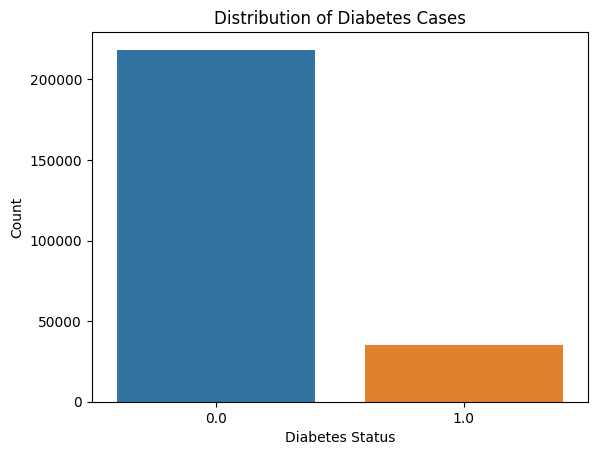

In [7]:
sns.countplot(x='Diabetes_binary', data=df)
plt.title('Distribution of Diabetes Cases')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.show()

## Uninvariate analysis

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x600 with 0 Axes>

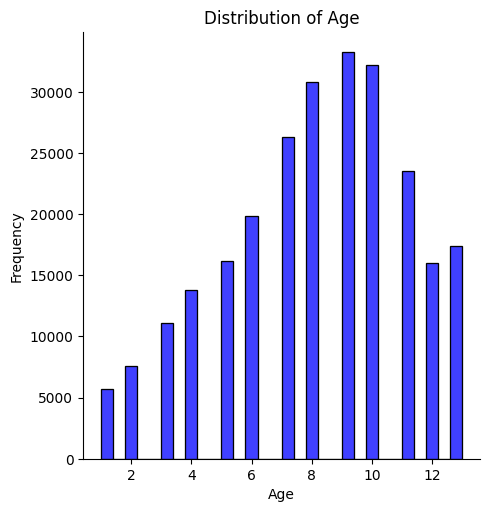

In [8]:
plt.figure(figsize=(10, 6))
sns.displot(df['Age'], bins=30, kde=False, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Bivariate analysis

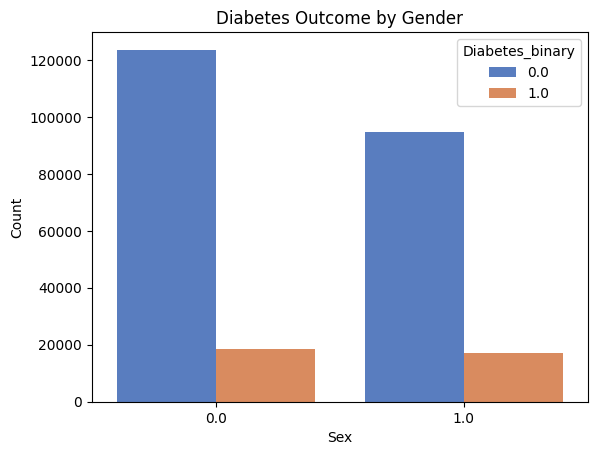

In [9]:
sns.countplot(x='Sex', hue='Diabetes_binary', data=df, palette='muted')
plt.title('Diabetes Outcome by Gender')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Mulivariate Analysis

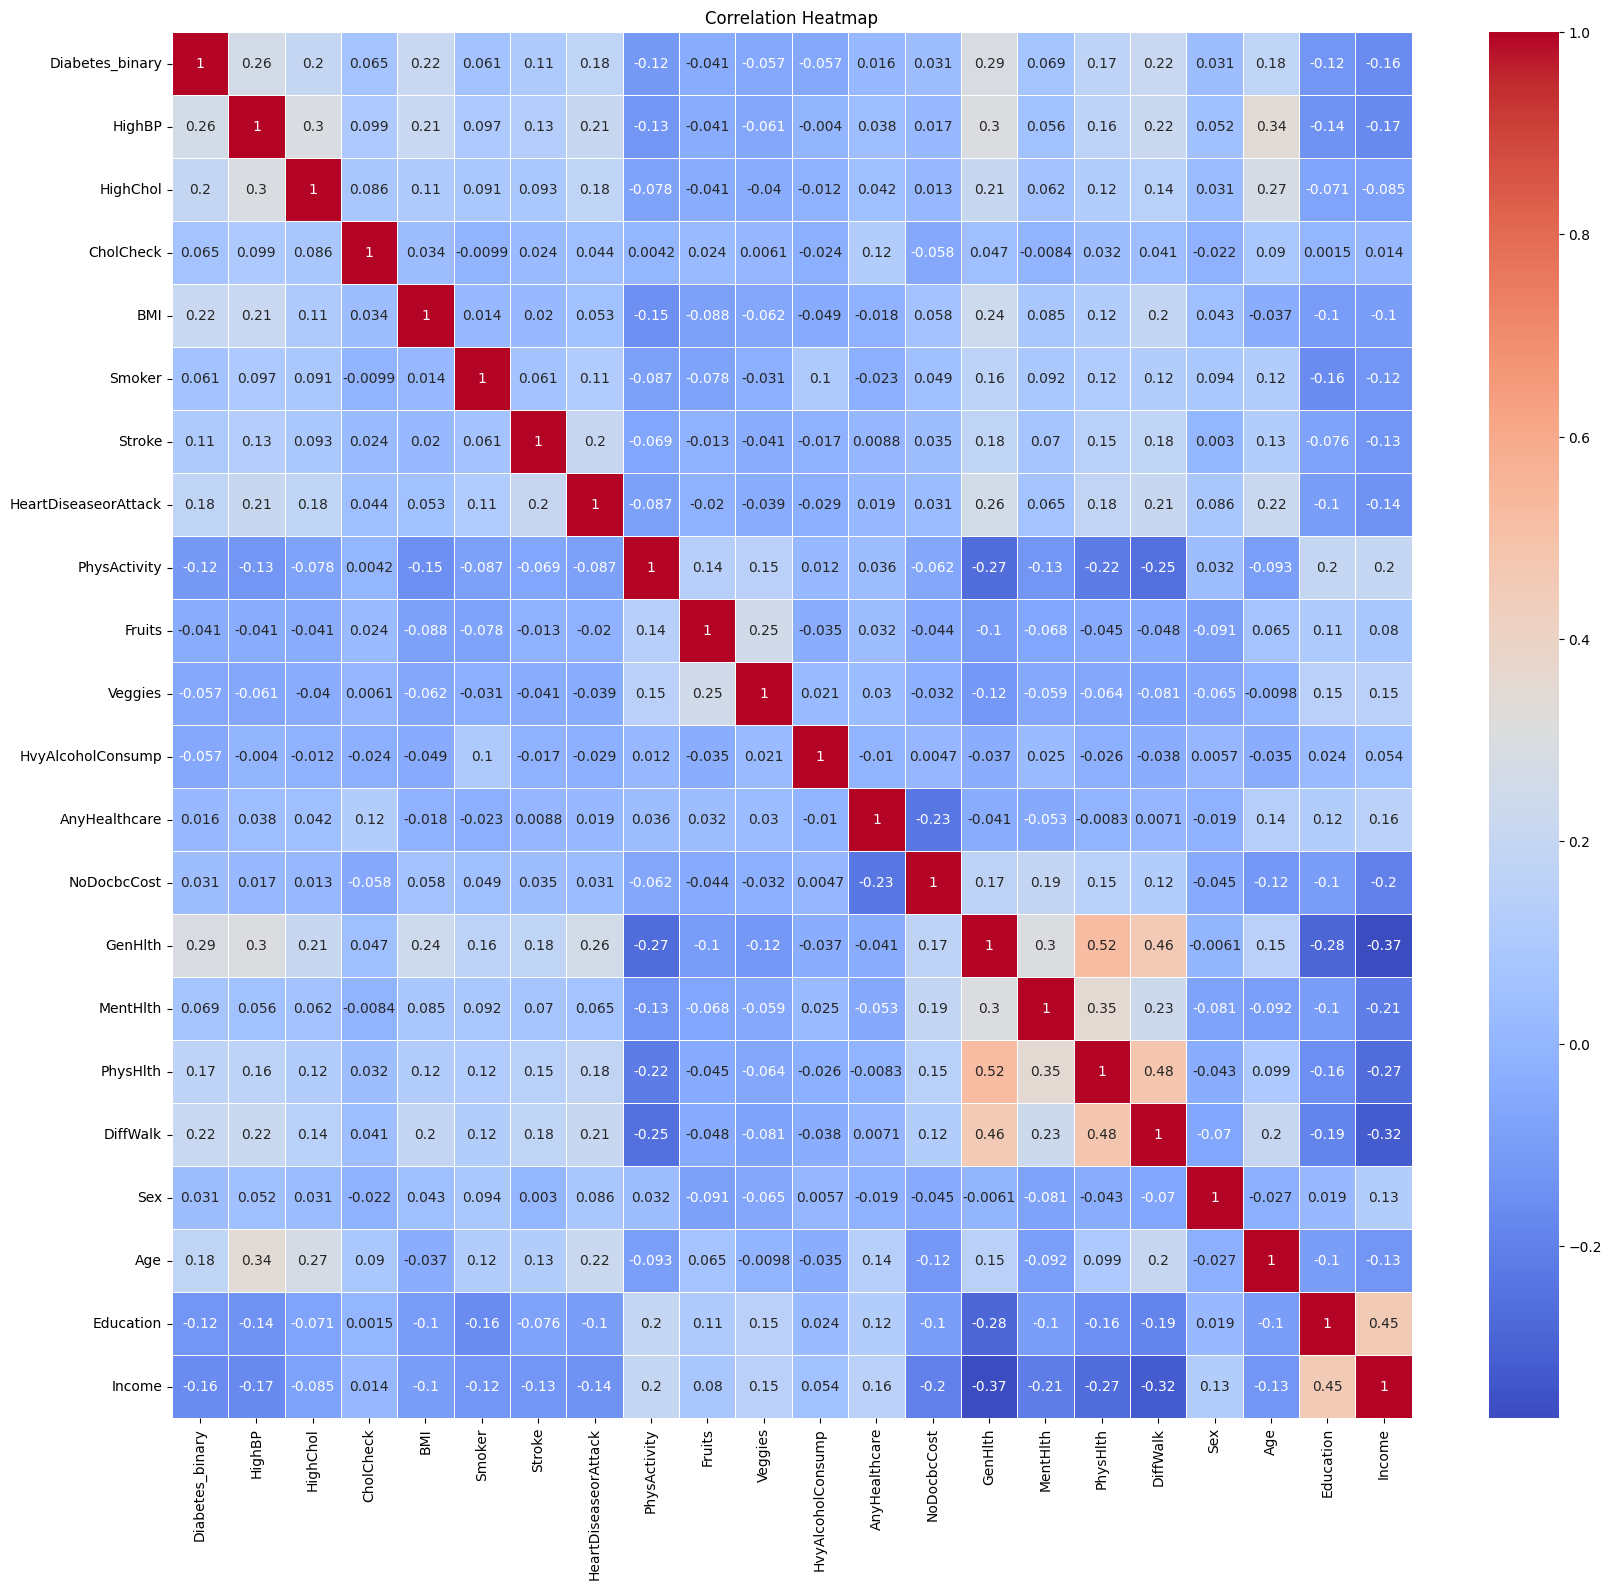

In [10]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## **Splitting Data into Train and Test Sets :**

In [11]:

X = df.drop('Diabetes_binary', axis=1)
y = df['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## **Training the model in Multiple Algorithms after applying PCA :**

In [12]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

for name, model in models.items():
    
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  
        ('pca', PCA(n_components=0.95)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)

    models[name] = pipeline

## **Testing the Models :**

In [13]:

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"\n{name}:\n")
    print(f"Predicted values: {y_pred}")



Random Forest:

Predicted values: [0. 0. 0. ... 0. 0. 0.]

Decision Tree:

Predicted values: [0. 0. 0. ... 0. 0. 0.]

Logistic Regression:

Predicted values: [0. 0. 0. ... 0. 0. 0.]


## **Testing the Models with Multiple Performance Evaluation Metrics :**

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

for name, model in models.items():
    y_pred = model.predict(X_test)

    print(f"\n{name} Metrics:\n")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")



Random Forest Metrics:

Accuracy: 0.8582071901608326
Precision: 0.4557303370786517
Recall: 0.14491925110761755
F1 Score: 0.2199089134677944
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     43739
         1.0       0.46      0.14      0.22      6997

    accuracy                           0.86     50736
   macro avg       0.67      0.56      0.57     50736
weighted avg       0.82      0.86      0.83     50736


Decision Tree Metrics:

Accuracy: 0.8015216020182908
Precision: 0.29537887867891865
Recall: 0.31699299699871375
F1 Score: 0.30580449469185167
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     43739
         1.0       0.30      0.32      0.31      6997

    accuracy                           0.80     50736
   macro avg       0.59      0.60      0.60     50736
weighted avg       0.81      0.80      0.80     50736


Logistic Regres

# **Comparing The Model Accuracy :**

In [15]:
for name, model in models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name} Accuracy: {accuracy}")

Random Forest Accuracy: 0.8582071901608326
Decision Tree Accuracy: 0.8015216020182908
Logistic Regression Accuracy: 0.8658349101229896


In [16]:
for name, model in models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Training R2 Score
    r2_train = r2_score(y_train, y_pred_train)
    print(f"{name} Training R2 Score: {r2_train}")

    # Validation R2 Score
    r2_test = r2_score(y_test, y_pred_test)
    print(f"{name} Validation R2 Score: {r2_test}")

    # Additional Metrics
    print(f"{name} Metrics:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred_test)}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")

    print("\n")

Random Forest Training R2 Score: 0.952929527504819
Random Forest Validation R2 Score: -0.19263056312804183
Random Forest Metrics:
MAE: 0.14179280983916745
MSE: 0.14179280983916745
RMSE: 0.37655386047571926


Decision Tree Training R2 Score: 0.9531345382735262
Decision Tree Validation R2 Score: -0.669417538323517
Decision Tree Metrics:
MAE: 0.19847839798170924
MSE: 0.19847839798170924
RMSE: 0.4455091446667613


Logistic Regression Training R2 Score: -0.14145895800814
Logistic Regression Validation R2 Score: -0.12847320589554934
Logistic Regression Metrics:
MAE: 0.1341650898770104
MSE: 0.1341650898770104
RMSE: 0.3662855305318658




## Based on the performance metrics obtained from the models, the Logistic Regressor demonstrates the highest accuracy. Consequently, we have decided to deploy the web application utilizing the Logistic Regressor for optimal results